## Suicide rates in areas within West Midlands

In [19]:
# Dependencies and Setup
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
during_covid_path = "CSVs/DuringCovid_a.csv"
pre_covid_path = "CSVs/PreCovid_a.csv"

# Read the covid data and the study results
during_covid = pd.read_csv(during_covid_path)
pre_covid = pd.read_csv(pre_covid_path)


# Display the data table for preview


In [20]:
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2019 - 21,14.667019,36.0,Similar,Similar
1,North East region,Middlesbrough,2019 - 21,14.879852,54.0,Worse,Similar
2,North East region,Redcar and Cleveland,2019 - 21,19.750601,69.0,Worse,Worse
3,North East region,Stockton-on-Tees,2019 - 21,10.206445,52.0,Similar,Similar
4,North East region,Darlington,2019 - 21,16.598023,47.0,Worse,Similar
...,...,...,...,...,...,...,...
147,East of England region,Suffolk,2019 - 21,10.387505,208.0,Similar,Similar
148,South East region,Surrey,2019 - 21,10.096817,316.0,Similar,Similar
149,West Midlands region,Warwickshire,2019 - 21,11.215052,172.0,Similar,Similar
150,South East region,West Sussex,2019 - 21,11.533312,265.0,Similar,Similar


In [21]:
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2017 - 19,10.361530,26.0,Similar,Similar
1,North East region,Middlesbrough,2017 - 19,14.464680,49.0,Worse,Similar
2,North East region,Redcar and Cleveland,2017 - 19,13.538658,47.0,Similar,Similar
3,North East region,Stockton-on-Tees,2017 - 19,8.673680,45.0,Similar,Better
4,North East region,Darlington,2017 - 19,13.646433,38.0,Similar,Similar
...,...,...,...,...,...,...,...
145,East of England region,Suffolk,2017 - 19,9.531723,188.0,Similar,Similar
146,South East region,Surrey,2017 - 19,8.180909,255.0,Better,Better
147,West Midlands region,Warwickshire,2017 - 19,9.382023,143.0,Similar,Similar
148,South East region,West Sussex,2017 - 19,9.678995,216.0,Similar,Similar


In [22]:
#Dataframe for areas in West Midlands pre-covid
not_wm = []
for x in range(len(pre_covid)):
    if pre_covid["Parent Name"][x] != "West Midlands region":
        not_wm.append(x)
pre_covid.drop(not_wm, inplace=True)
pre_covid.reset_index(drop=True, inplace=True)

# Export the City_Data into a csv
pre_covid.to_csv("Output_csv/west_midlands_pre.csv", index_label="City_ID")

pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,West Midlands region,Herefordshire,2017 - 19,10.520213,53.0,Similar,Similar
1,West Midlands region,Telford and Wrekin,2017 - 19,10.221080,47.0,Similar,Similar
2,West Midlands region,Stoke-on-Trent,2017 - 19,12.479695,80.0,Similar,Similar
3,West Midlands region,Shropshire,2017 - 19,9.943113,84.0,Similar,Similar
4,West Midlands region,Birmingham,2017 - 19,8.658825,236.0,Better,Better
5,West Midlands region,Coventry,2017 - 19,10.575171,99.0,Similar,Similar
6,West Midlands region,Dudley,2017 - 19,10.569485,87.0,Similar,Similar
7,West Midlands region,Sandwell,2017 - 19,10.801118,89.0,Similar,Similar
8,West Midlands region,Solihull,2017 - 19,13.265490,74.0,Worse,Worse
9,West Midlands region,Walsall,2017 - 19,9.018962,65.0,Similar,Similar


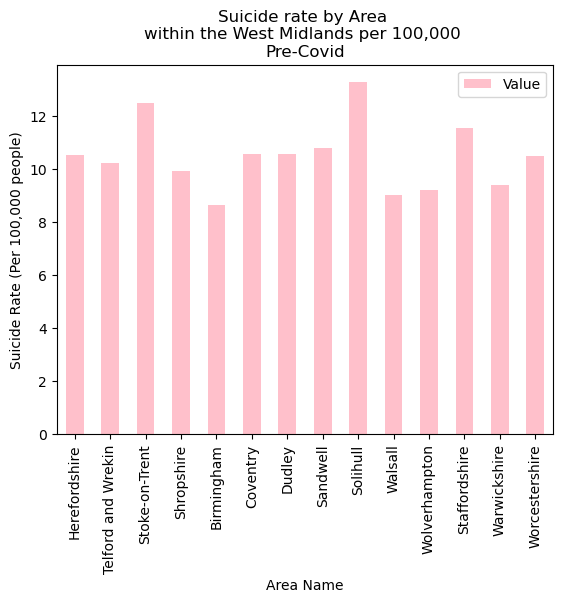

In [5]:
#Bar plot to show suicide rates pre-covid in the West Midlands
pre_covid_df = pre_covid.plot.bar(x="Area Name",y="Value", color="pink")
plt.xlabel("Area Name")
plt.ylabel("Suicide Rate (Per 100,000 people)")
plt.title(f"Suicide rate by Area \nwithin the West Midlands per 100,000 \nPre-Covid")

pre_covid_df.figure.savefig('Images/Areas in Westmidlands.png')
plt.show()

In [23]:
#Dataframe for areas in West Midlands during covid
not_wm_c = []
for x in range(len(during_covid)):
    if during_covid["Parent Name"][x] != "West Midlands region":
        not_wm_c.append(x)
during_covid.drop(not_wm_c, inplace=True)
during_covid.reset_index(drop=True, inplace=True)

# Export the City_Data into a csv
during_covid.to_csv("Output_csv/west_midlands_during.csv", index_label="City_ID")
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,West Midlands region,Herefordshire,2019 - 21,12.580421,64.0,Similar,Similar
1,West Midlands region,Telford and Wrekin,2019 - 21,11.428613,53.0,Similar,Similar
2,West Midlands region,Stoke-on-Trent,2019 - 21,16.389457,106.0,Worse,Worse
3,West Midlands region,Shropshire,2019 - 21,11.553739,99.0,Similar,Similar
4,West Midlands region,Birmingham,2019 - 21,8.691763,243.0,Better,Better
5,West Midlands region,Coventry,2019 - 21,9.252810,89.0,Similar,Similar
6,West Midlands region,Dudley,2019 - 21,10.305500,86.0,Similar,Similar
7,West Midlands region,Sandwell,2019 - 21,11.157776,93.0,Similar,Similar
8,West Midlands region,Solihull,2019 - 21,10.301322,59.0,Similar,Similar
9,West Midlands region,Walsall,2019 - 21,9.049204,65.0,Similar,Similar


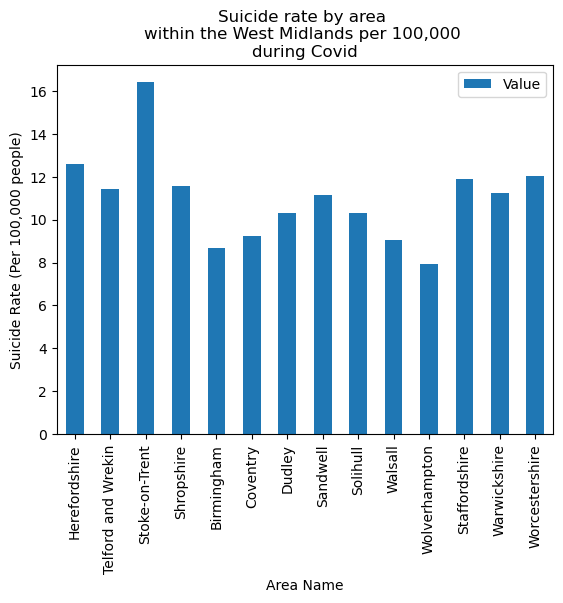

In [7]:
#Bar plot to show suicide rates during covid in the West Midlands
during_covid_df = during_covid.plot.bar(x="Area Name",y="Value")
plt.xlabel("Area Name")
plt.ylabel("Suicide Rate (Per 100,000 people)")
plt.title(f"Suicide rate by area \nwithin the West Midlands per 100,000 \nduring Covid")

during_covid_df.figure.savefig('Images/Areas in Westmidlands during covid.png')
plt.show()

In [8]:
labels = ['Herefordshire','Telford and Wrekin', 'Stoke-on-Trent','Shropshire','Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton', 'Staffordshire', 'Warwickshire', 'Worcestershire']


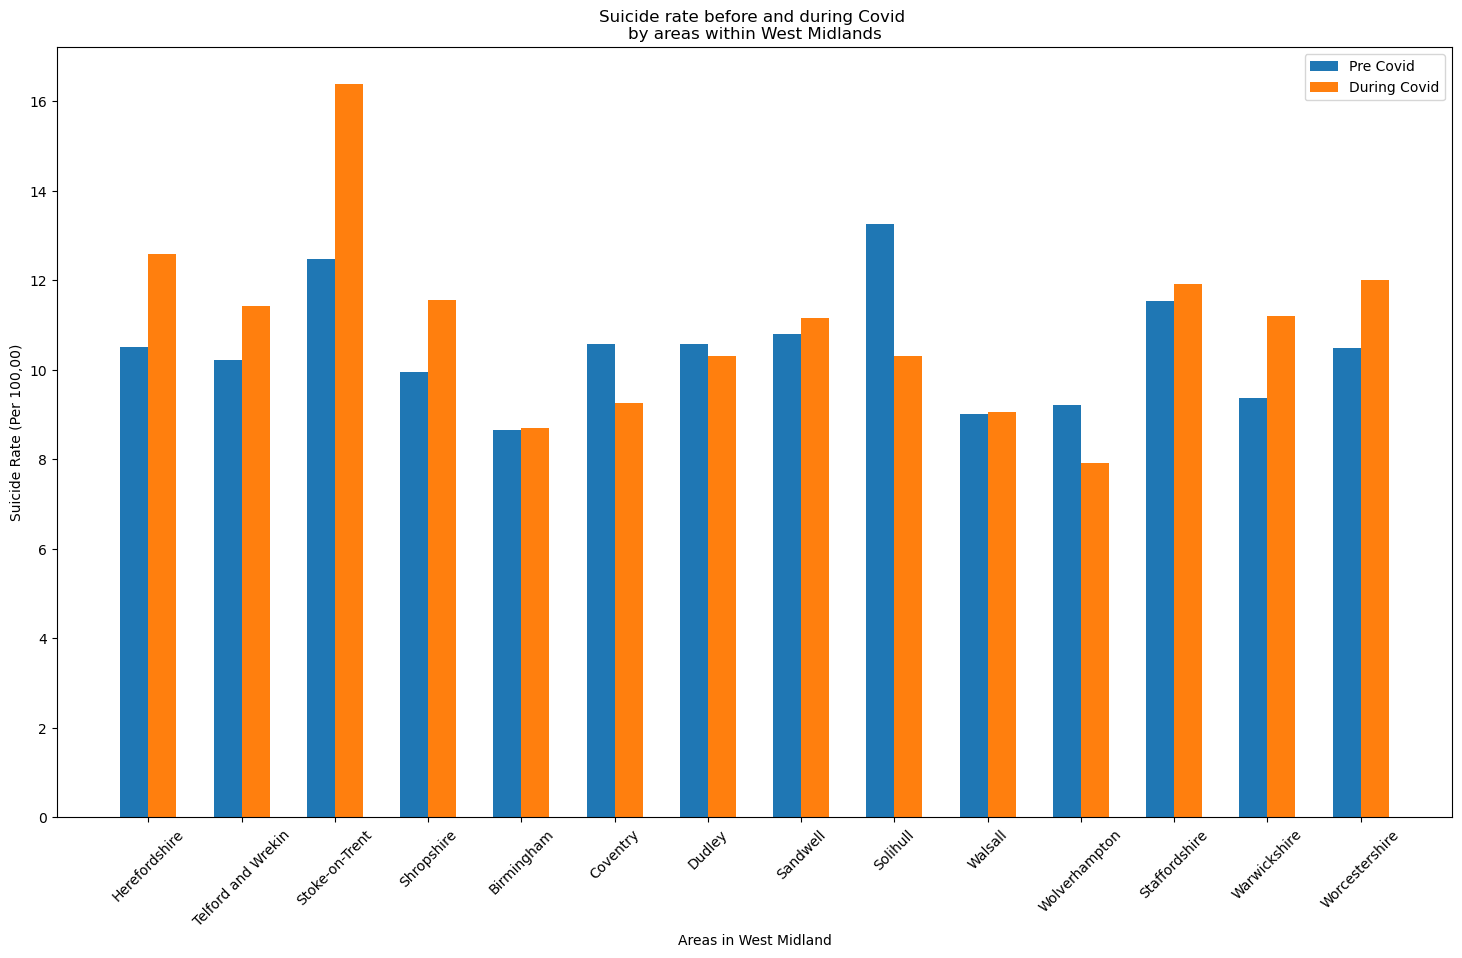

In [11]:
w=0.3
x = ['Herefordshire','Telford and Wrekin', 'Stoke-on-Trent','Shropshire','Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton', 'Staffordshire', 'Warwickshire', 'Worcestershire']

pre_covid = [10.520213, 10.221080, 12.479695, 9.943113, 8.658825, 10.575171, 10.569485, 10.801118, 13.265490, 9.018962, 9.208618, 11.540015, 9.382023, 10.479799]
during_covid = [12.580421, 11.428613, 16.389457, 11.553739, 8.691763, 9.252810, 10.305500, 11.157776, 10.301322, 9.049204, 7.920631, 11.910169, 11.215052, 12.015792]



bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, pre_covid,w,label="Pre Covid")
plt.bar(bar2, during_covid,w,label="During Covid")

plt.xlabel('Areas in West Midland')
plt.ylabel('Suicide Rate (Per 100,00)')
plt.title('Suicide rate before and during Covid \nby areas within West Midlands')
plt.legend()
plt.xticks(bar1+w/2, x, rotation=45)
plt.rcParams["figure.figsize"] = (18,10)
plt.savefig('Images/suicide_by_area_westmidlands.png')
